### To determine the contents of a file:

In [1]:
import opusFC
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

f = r"R:\Jeff\FTIR\Structural Mapping\8.4.2022CoffeeRing\Attempt2.0"
dbs = opusFC.listContents(f)
print(dbs)
dbs[1]

[('AB', '3D', 'NONE'), ('SSC', '3D', 'NONE'), ('RSC', '2D', 'NONE'), ('TRC', '3D', 'NONE')]


('SSC', '3D', 'NONE')

### Load the first datablock in dbs: 

In [2]:
data = opusFC.getOpusData(f, dbs[1])
data.regions
#data

[Region 1 (9 x 3), Region 2 (5 x 3)]

In [3]:
data.regions[1].mapX[:]

array([ 6676.22021484, 10539.06738281, 14401.9140625 , 18264.76171875,
       22127.609375  ,  6676.22021484, 10539.06738281, 14401.9140625 ,
       18264.76171875, 22127.609375  ,  6676.22021484, 10539.06738281,
       14401.9140625 , 18264.76171875, 22127.609375  ])

#####This is the money part: extracting x and y data

In [4]:
#make a dictionary of x-y location data
list_of_regions=[]
x_coordinates = []
y_coordinates = []
for j in range(len(data.regions)):

    x_coordinates = np.append(x_coordinates, data.regions[j].mapX[:])
    y_coordinates = np.append(y_coordinates, data.regions[j].mapY[:])
    for i in range(len(data.regions[j].mapX)):

        list_of_regions.append(j+1) #data.regions[j].split())
        
    #list_of_regions = i in range(len(data.regions[j].mapX))
#xydict = {'region':list_of_regions,'x_coordinate':data.regions[0].mapX[:],'y coordinate':data.regions[0].mapY[:]}#,data.x:data.regions[0].spectra[:]}
xydict = {'region':list_of_regions,'x_coordinate':x_coordinates,'y coordinate':y_coordinates}#,data.x:data.regions[0].spectra[:]}
len(list_of_regions)


42

In [5]:
#Make a loop or use a fancy 1 liner to take all of the X and Y data from here and then put it in a dataframe as the first 2 rows, or maybe the 2nd and 3rd rows 
# (probably best to have name/title of column, then x, then y, then data)
xydataframe = pd.DataFrame(data=xydict)#[data.regions[0].mapX[:],data.regions[0].mapY[:]])
xydataframe

,region,x_coordinate,y coordinate
0,1,5603.669922,2015.540039
1,1,5702.126465,2015.540039
2,1,5800.583008,2015.540039
3,1,5899.039551,2015.540039
4,1,5997.496094,2015.540039
5,1,6095.952637,2015.540039
6,1,6194.409180,2015.540039
7,1,6292.865723,2015.540039
8,1,6391.322266,2015.540039
9,1,5603.669922,2283.677002


In [6]:
type(data.regions[0].spectra[:])


numpy.ndarray

In [23]:
#make dataframe of actual spectra, need to figure out how to get 2nd region here!!!!

spectra_df = pd.DataFrame()
print('data regions len:' ,len(data.regions))
for i in range(len(data.regions)):
    
  #  print(data.regions[i].spectra[:])
    spectra_df = pd.concat([spectra_df,pd.DataFrame(data.regions[i].spectra[:])])
#data.regions[].spectra[:]
spectra_df

spectra_df =spectra_df.transpose()
labeledspectra_df = spectra_df.set_index(data.x)#what does drop do here? seemingly nothing
#spectra_df['wavenumber'] = data.x


tlabeledspectra_df = labeledspectra_df.transpose()
tlabeledspectra_df.index = tlabeledspectra_df.index.set_names(['Index within Region'])
tlabeledspectra_df = tlabeledspectra_df.reset_index(col_fill="index for region")
tlabeledspectra_df

data regions len: 2


,Index within Region,3998.516412597656,3997.0883710217286,3995.660329445801,3994.232287869873,3992.804246293945,3991.3762047180176,3989.94816314209,3988.520121566162,3987.092079990234,...,612.6298360729975,611.2017944970698,609.7737529211422,608.3457113452146,606.9176697692869,605.4896281933588,604.0615866174312,602.6335450415036,601.2055034655759,599.7774618896484
0,0,0.450608,0.446442,0.442394,0.440009,0.438879,0.439040,0.441915,0.447218,0.451534,...,0.048871,0.048008,0.046764,0.045352,0.043842,0.042236,0.040423,0.038270,0.035896,0.033662
1,1,0.443068,0.438975,0.434961,0.432567,0.431418,0.431545,0.434341,0.439537,0.443788,...,0.048647,0.047797,0.046573,0.045188,0.043677,0.042017,0.040136,0.037961,0.035612,0.033399
2,2,0.436386,0.432401,0.428464,0.426071,0.424868,0.424941,0.427686,0.432813,0.437006,...,0.050558,0.049824,0.048655,0.047223,0.045583,0.043788,0.041849,0.039701,0.037402,0.035193
3,3,0.458521,0.454302,0.450143,0.447644,0.446430,0.446530,0.449387,0.454760,0.459216,...,0.051899,0.051095,0.049862,0.048361,0.046642,0.044763,0.042726,0.040460,0.038052,0.035777
4,4,0.449343,0.445209,0.441152,0.438764,0.437657,0.437819,0.440636,0.445862,0.450138,...,0.057484,0.056565,0.055153,0.053429,0.051464,0.049353,0.047119,0.044671,0.042057,0.039540
5,5,0.434332,0.430282,0.426328,0.423978,0.422858,0.423008,0.425774,0.430864,0.435003,...,0.058880,0.057896,0.056446,0.054736,0.052822,0.050730,0.048424,0.045822,0.043046,0.040421
6,6,0.433498,0.429501,0.425583,0.423232,0.422078,0.422180,0.424920,0.430033,0.434232,...,0.059203,0.058215,0.056738,0.054995,0.053048,0.050925,0.048610,0.046036,0.043297,0.040679
7,7,0.435922,0.431825,0.427808,0.425432,0.424333,0.424503,0.427268,0.432368,0.436551,...,0.058974,0.058007,0.056576,0.054906,0.053073,0.051066,0.048806,0.046219,0.043448,0.040816
8,8,0.456240,0.452050,0.447908,0.445420,0.444223,0.444341,0.447187,0.452508,0.456898,...,0.057028,0.056073,0.054697,0.053085,0.051283,0.049314,0.047139,0.044669,0.042012,0.039495
9,9,0.459336,0.455137,0.451004,0.448514,0.447267,0.447333,0.450207,0.455623,0.460079,...,0.047344,0.046620,0.045522,0.044209,0.042718,0.041067,0.039228,0.037146,0.034920,0.032806


In [24]:

#complete_df = xydataframe
# for i in range(len(data.x)):
#     complete_df = pd.concat(xydataframe, labeledspectra_df[1])

twodfs = [xydataframe, tlabeledspectra_df]

complete_df = pd.concat(twodfs, axis=1,join='inner')

complete_df
#complete_df[complete_df["region"]>1]


,region,x_coordinate,y coordinate,Index within Region,3998.516412597656,3997.0883710217286,3995.660329445801,3994.232287869873,3992.804246293945,3991.3762047180176,...,612.6298360729975,611.2017944970698,609.7737529211422,608.3457113452146,606.9176697692869,605.4896281933588,604.0615866174312,602.6335450415036,601.2055034655759,599.7774618896484
0,1,5603.669922,2015.540039,0,0.450608,0.446442,0.442394,0.440009,0.438879,0.439040,...,0.048871,0.048008,0.046764,0.045352,0.043842,0.042236,0.040423,0.038270,0.035896,0.033662
1,1,5702.126465,2015.540039,1,0.443068,0.438975,0.434961,0.432567,0.431418,0.431545,...,0.048647,0.047797,0.046573,0.045188,0.043677,0.042017,0.040136,0.037961,0.035612,0.033399
2,1,5800.583008,2015.540039,2,0.436386,0.432401,0.428464,0.426071,0.424868,0.424941,...,0.050558,0.049824,0.048655,0.047223,0.045583,0.043788,0.041849,0.039701,0.037402,0.035193
3,1,5899.039551,2015.540039,3,0.458521,0.454302,0.450143,0.447644,0.446430,0.446530,...,0.051899,0.051095,0.049862,0.048361,0.046642,0.044763,0.042726,0.040460,0.038052,0.035777
4,1,5997.496094,2015.540039,4,0.449343,0.445209,0.441152,0.438764,0.437657,0.437819,...,0.057484,0.056565,0.055153,0.053429,0.051464,0.049353,0.047119,0.044671,0.042057,0.039540
5,1,6095.952637,2015.540039,5,0.434332,0.430282,0.426328,0.423978,0.422858,0.423008,...,0.058880,0.057896,0.056446,0.054736,0.052822,0.050730,0.048424,0.045822,0.043046,0.040421
6,1,6194.409180,2015.540039,6,0.433498,0.429501,0.425583,0.423232,0.422078,0.422180,...,0.059203,0.058215,0.056738,0.054995,0.053048,0.050925,0.048610,0.046036,0.043297,0.040679
7,1,6292.865723,2015.540039,7,0.435922,0.431825,0.427808,0.425432,0.424333,0.424503,...,0.058974,0.058007,0.056576,0.054906,0.053073,0.051066,0.048806,0.046219,0.043448,0.040816
8,1,6391.322266,2015.540039,8,0.456240,0.452050,0.447908,0.445420,0.444223,0.444341,...,0.057028,0.056073,0.054697,0.053085,0.051283,0.049314,0.047139,0.044669,0.042012,0.039495
9,1,5603.669922,2283.677002,9,0.459336,0.455137,0.451004,0.448514,0.447267,0.447333,...,0.047344,0.046620,0.045522,0.044209,0.042718,0.041067,0.039228,0.037146,0.034920,0.032806


In [ ]:

(complete_df.T).to_csv(r'C:\Users\jrosh\Documents\FTIR_Mapping\Results\test.csv')

x = [key for key in complete_df.keys() if type(key) == float]
complete_df[x]

fig, ax = plt.subplots()    # create figure and axes
for index, row in complete_df[x].iterrows(): 
    ax.plot(x, row)
plt.show()
#complete_df.keys(2::)



plt.plot(x,complete_df.iloc[2][2:])

In [60]:
complete_df.columns[2:]



Index([ 3998.516412597656, 3997.0883710217286,  3995.660329445801,
        3994.232287869873,  3992.804246293945, 3991.3762047180176,
         3989.94816314209,  3988.520121566162,  3987.092079990234,
       3985.6640384143066,
       ...
        612.6298360729975,  611.2017944970698,  609.7737529211422,
        608.3457113452146,  606.9176697692869,  605.4896281933588,
        604.0615866174312,  602.6335450415036,  601.2055034655759,
        599.7774618896484],
      dtype='object', length=2381)

In [73]:
complete_df.iterrows()
complete_df.iloc[3,:][2:]

3998.516413    0.441578
3997.088371    0.438985
3995.660329    0.436477
3994.232288    0.435131
3992.804246    0.434690
                 ...   
605.489628     0.039587
604.061587     0.037973
602.633545     0.036131
601.205503     0.034086
599.777462     0.032038
Name: 3, Length: 2381, dtype: float64

In [84]:
complete_df[3]

KeyError: 3

In [88]:
loc = list(map(float, complete_df.columns[2:]))


print(len(complete_df.columns[2:]))
print(len(loc))
print(complete_df.loc[1,[2:]])

fig, ax = plt.subplots()
for row in complete_df.iterrows():
    ax.scatter(row[1], loc, label=row[1].name)

plt.legend()    
plt.show()

SyntaxError: invalid syntax (Temp/ipykernel_18396/3602723537.py, line 5)

ValueError: x and y must be the same size

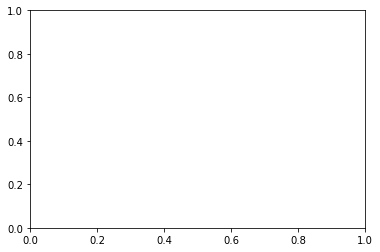

In [70]:
fig, ax = plt.subplots()
# for row in complete_df.iterrows():
#     ax.scatter(row[1], complete_df.columns[2:] , label=row[1].name)

ax.scatter(complete_df.iloc[1,:], complete_df.columns[2:] , label=row[1].name)
complete_df.iloc[1,:]

plt.legend()    
plt.show()

### Access loaded data and parameters:

In [ ]:
data.x                    # X coordinates
data.parameters['SNM']    # Sample name
data.description          # Description of data object
opusFC.paramDict['SNM']     # String description of SNM

### Access and save visible images:

In [ ]:
images = opusFC.getVisImages(f)

for img in images:
    data = img['image']
    title = img['Title']
    imgext = img['imgext']
    f = "{0}_{1}.{2}".format(f, title, imgext)
    with open(f, 'wb') as fd:
        fd.write(data)

In [ ]:
d_db = pd.DataFrame()
bt = tuple()
for things in dbs:
    print(opusFC.getOpusData(f,things))

In [ ]:
d

In [ ]:
opusFC.MultiRegionTRCDataReturn(labels, regions, **kwds)